<a href="https://colab.research.google.com/github/Makushiin/CS559-Projects/blob/main/CS559A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

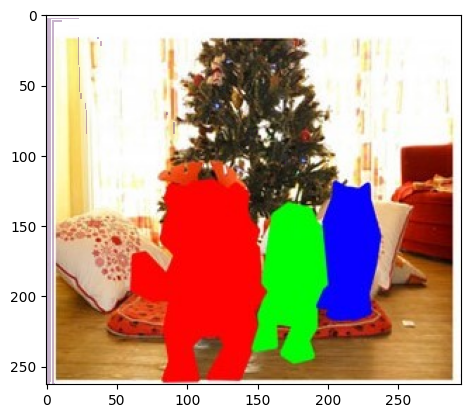

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color

def regiongrowing(I, seeds, reg_maxdist):
    if reg_maxdist is None:
        reg_maxdist = 0

    J = np.zeros_like(I, dtype=int)  # Output image
    Isizes = I.shape  # Dimensions of input image

    # Initialize mean, size, and neighbour list for each region
    reg_means = [I[x, y] for x, y in seeds]
    reg_sizes = [1 for _ in seeds]
    neg_lists = [[(x, y, I[x, y])] for x, y in seeds]
    J[tuple(zip(*seeds))] = list(range(1, len(seeds) + 1))

    # Neighbor locations (footprint)
    neigb = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    # Start region growing for each seed point
    for i in range(len(seeds)):
        grow = True
        while grow and reg_sizes[i] < np.prod(Isizes):
            grow = False
            for j in range(len(neigb)):
                # Calculate the neighbour coordinate
                xn, yn = neg_lists[i][-1][0] + neigb[j][0], neg_lists[i][-1][1] + neigb[j][1]
                # Check if neighbour is inside the image
                ins = (xn >= 0) and (yn >= 0) and (xn < Isizes[0]) and (yn < Isizes[1])
                # Add neighbor if inside and not already part of any region
                if ins and (J[xn, yn] == 0):
                    J[xn, yn] = i + 1
                    neg_lists[i].append((xn, yn, I[xn, yn]))
                    grow = True

            # Add pixel with intensity nearest to the mean of the region, to the region
            dist = [abs(pixel[2] - reg_means[i]) for pixel in neg_lists[i]]
            pixdist, index = min((val, idx) for (idx, val) in enumerate(dist))

            if pixdist < reg_maxdist:
                # Update the region mean and size
                reg_means[i] = (reg_means[i] * reg_sizes[i] + neg_lists[i][index][2]) / (reg_sizes[i] + 1)
                reg_sizes[i] += 1
                # Remove the pixel from the neighbour list
                neg_lists[i].pop(index)

    # Return the segmented areas as logical matrix
    regions = [J == i + 1 for i in range(len(seeds))]
    return regions

# Load and convert the image to grayscale
I_rgb = io.imread('ThreeRegions.jpg')  # Replace with the path to your image
I_gray = color.rgb2gray(I_rgb)

# Define the seeds for the regions (replace these with your seed coordinates)
seeds = [(111, 174), (180, 183), (217, 159)]

# Apply the region growing algorithm
regions = regiongrowing(I_gray, seeds, 0.2)

# Display the results
plt.imshow(I_rgb)  # Display the original image
for region in regions:
    plt.imshow(np.ma.masked_where(region == False, region), alpha=0.3)  # Overlay the regions
plt.show()
